In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

## Load Dataset 

In [2]:
df_full_feature = pd.read_csv('../Dataset/Standarisasi/processed_dataset_10_std.csv',sep=',')
df_chi_square = pd.read_csv('../Dataset/Standarisasi/processed_dataset_chi_square_std.csv', sep=',')
df_feature_selection = pd.read_csv('../Dataset/Standarisasi/processed_dataset_5_std.csv',sep=',')
df_slice = pd.read_csv('../Dataset/Standarisasi/processed_dataset_slice_std.csv',sep=',')

## Splitting Features And Label

In [3]:
# Dataset Full Feature
full_feature_x = df_full_feature[df_full_feature.columns[:9]]
full_feature_y = df_full_feature['label']

full_feature_x.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount
0,-1.0,0.0,0.0,0.0,0.816497,-1.177074,-1.252085,-1.176889,-1.176889
1,-1.0,0.0,0.0,0.0,-2.449490,1.745316,0.134840,1.746007,1.746007
2,1.0,0.0,0.0,0.0,0.000000,0.446476,0.905354,0.446165,0.446165
3,1.0,0.0,0.0,0.0,0.000000,0.446476,0.905354,0.446165,0.446165
4,1.0,0.0,0.0,0.0,0.000000,0.446476,0.905354,0.446165,0.446165


In [4]:
# Dataset Chi Square 
chi_square_x = df_chi_square[df_chi_square.columns[:5]]
chi_square_y = df_chi_square['label']

chi_square_x.head(5)

,dst,src,Protocol,pktcount,pktcount.1
0,0.0,-1.0,0.0,-1.487864,-1.487864
1,0.0,-1.0,0.0,1.331957,1.331957
2,0.0,1.0,0.0,0.077954,0.077954
3,0.0,1.0,0.0,0.077954,0.077954


In [5]:
# Dataset Feature Selection
feature_selection_x = df_feature_selection[df_feature_selection.columns[:5]]
feature_selection_y = df_feature_selection['label']

feature_selection_x.head(5)

,pktrate,pktperflow,Protocol,src,dst
0,0.0,1.000000,0.0,-1.0,0.0
1,0.0,-1.666667,0.0,-1.0,0.0
2,0.0,0.333333,0.0,1.0,0.0
3,0.0,0.333333,0.0,1.0,0.0


In [6]:
# Dataset Slice
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,0.0,-0.707107,0.0,-1.267309
1,0.0,-0.707107,0.0,1.177204
2,0.0,1.414214,0.0,0.090104


### Full Features Model

In [7]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(full_feature_x,full_feature_y,test_size=0.30,random_state=5)

In [8]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

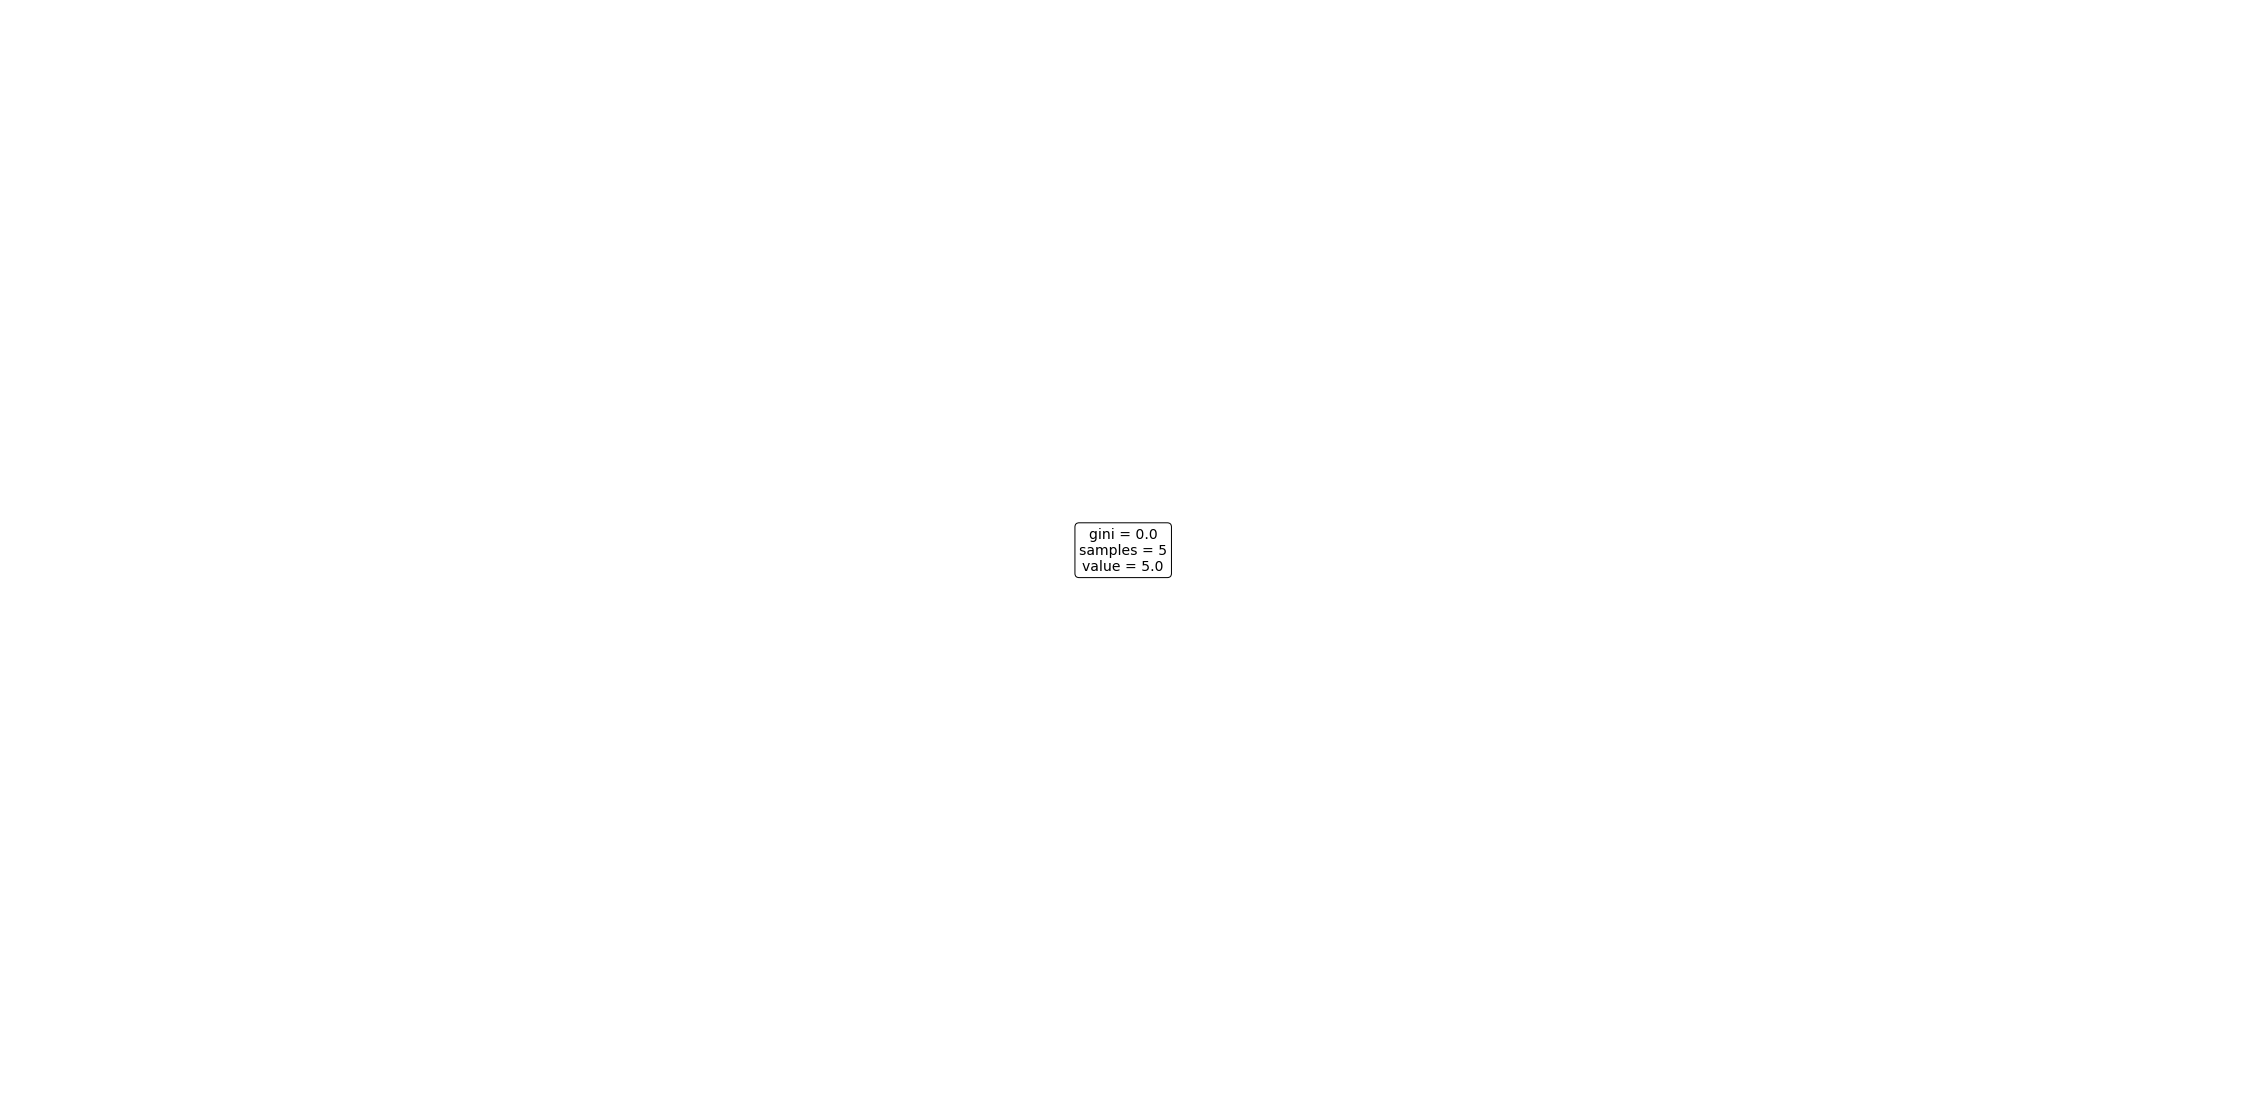

In [9]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [10]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [11]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Accuracy: 100.0


In [12]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 100.0


### Chi Square Model

In [13]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(chi_square_x,chi_square_y,test_size=0.30,random_state=5)

In [14]:
classifier_chi = DecisionTreeClassifier(max_depth=11)
classifier_chi.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11)

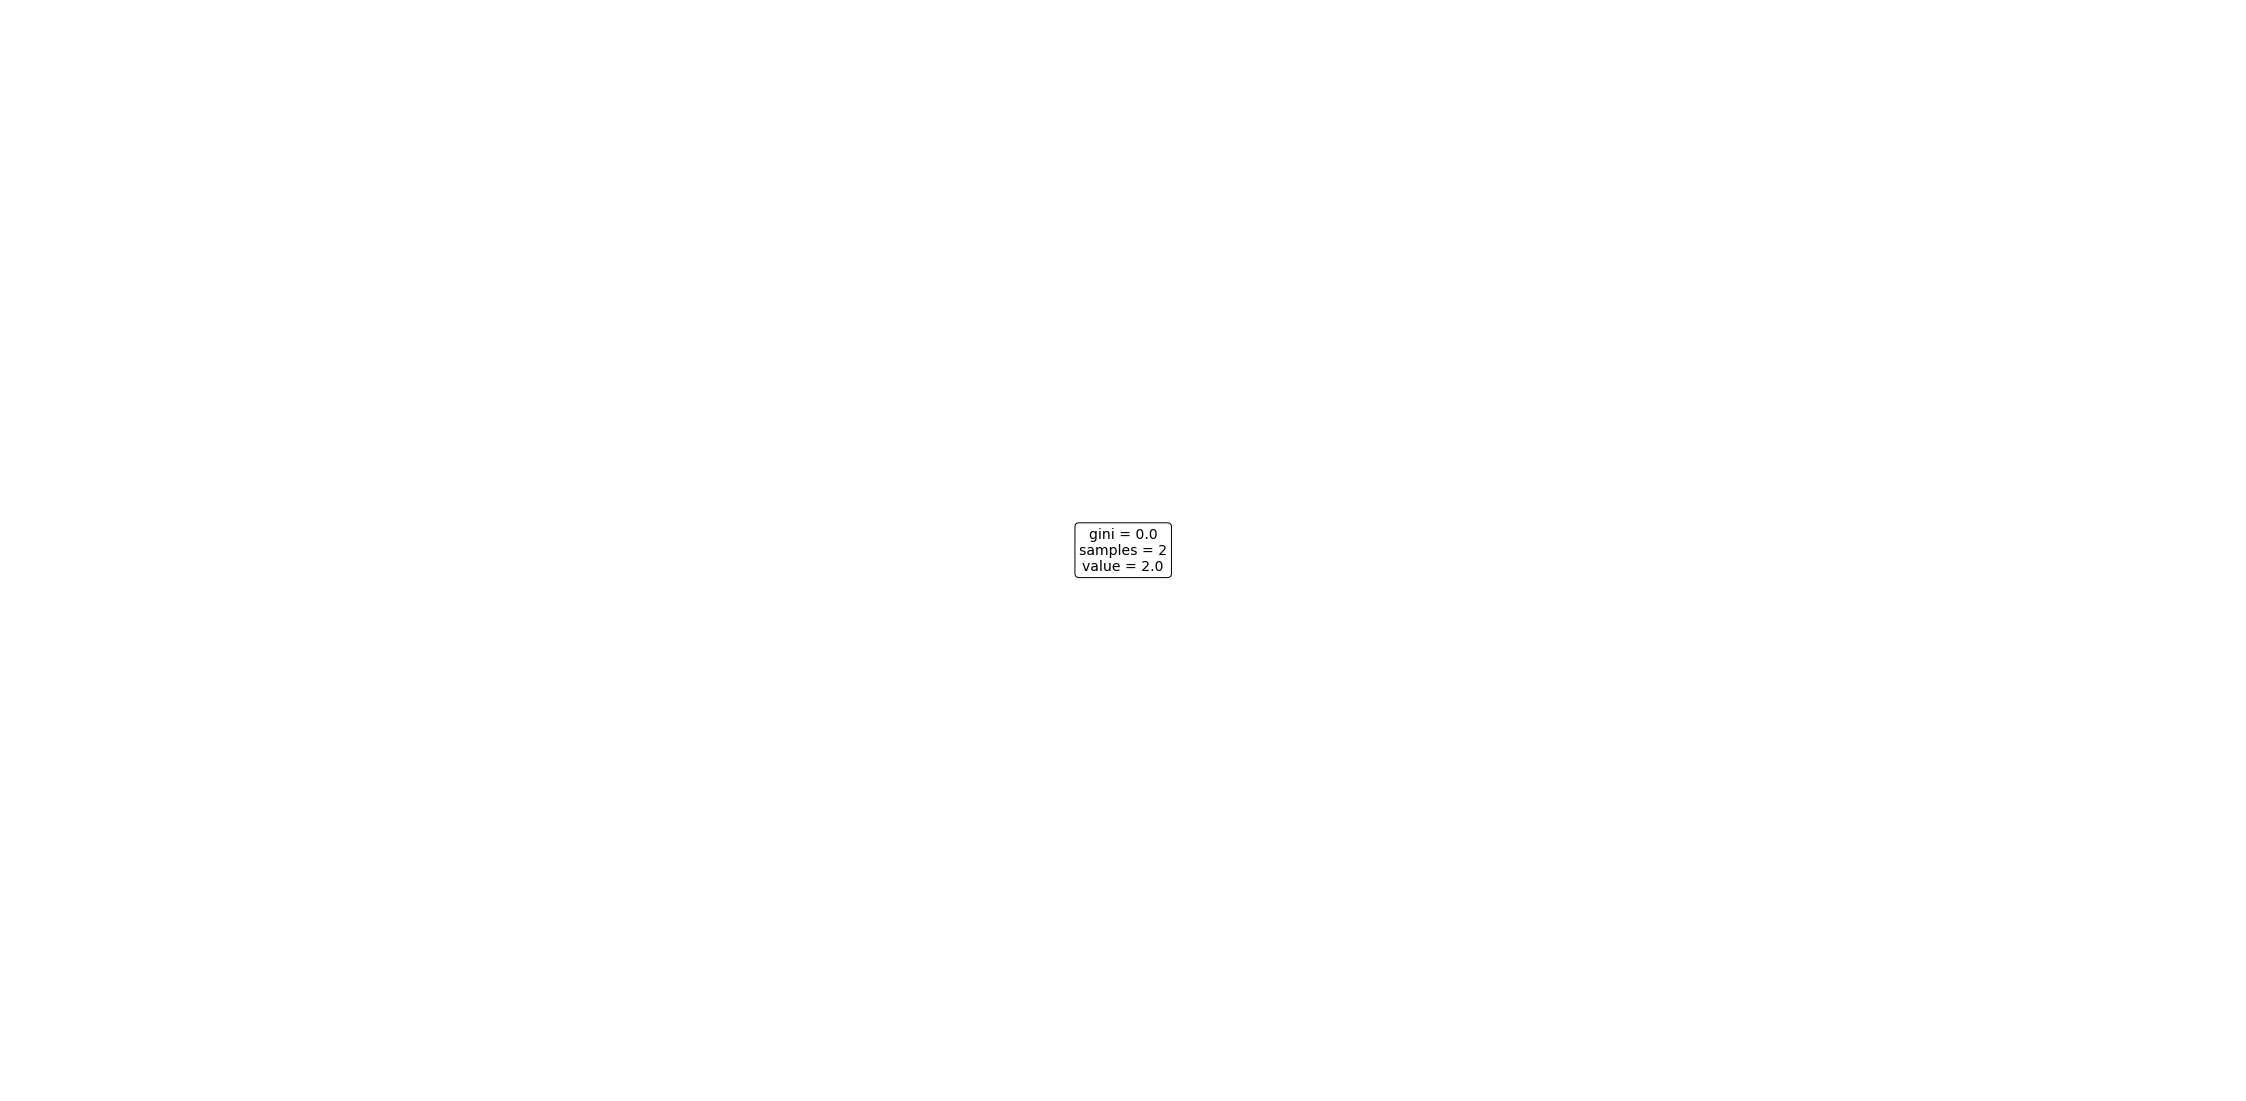

In [15]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier_chi, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [16]:
y_pred_train = classifier_chi.predict(x_train)
y_pred_test = classifier_chi.predict(x_test)

In [17]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 100.0


In [18]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 100.0


### Feature Selection

In [19]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(feature_selection_x,feature_selection_y,test_size=0.30,random_state=5)

In [20]:
classifier_feature = DecisionTreeClassifier(max_depth=6)
classifier_feature.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

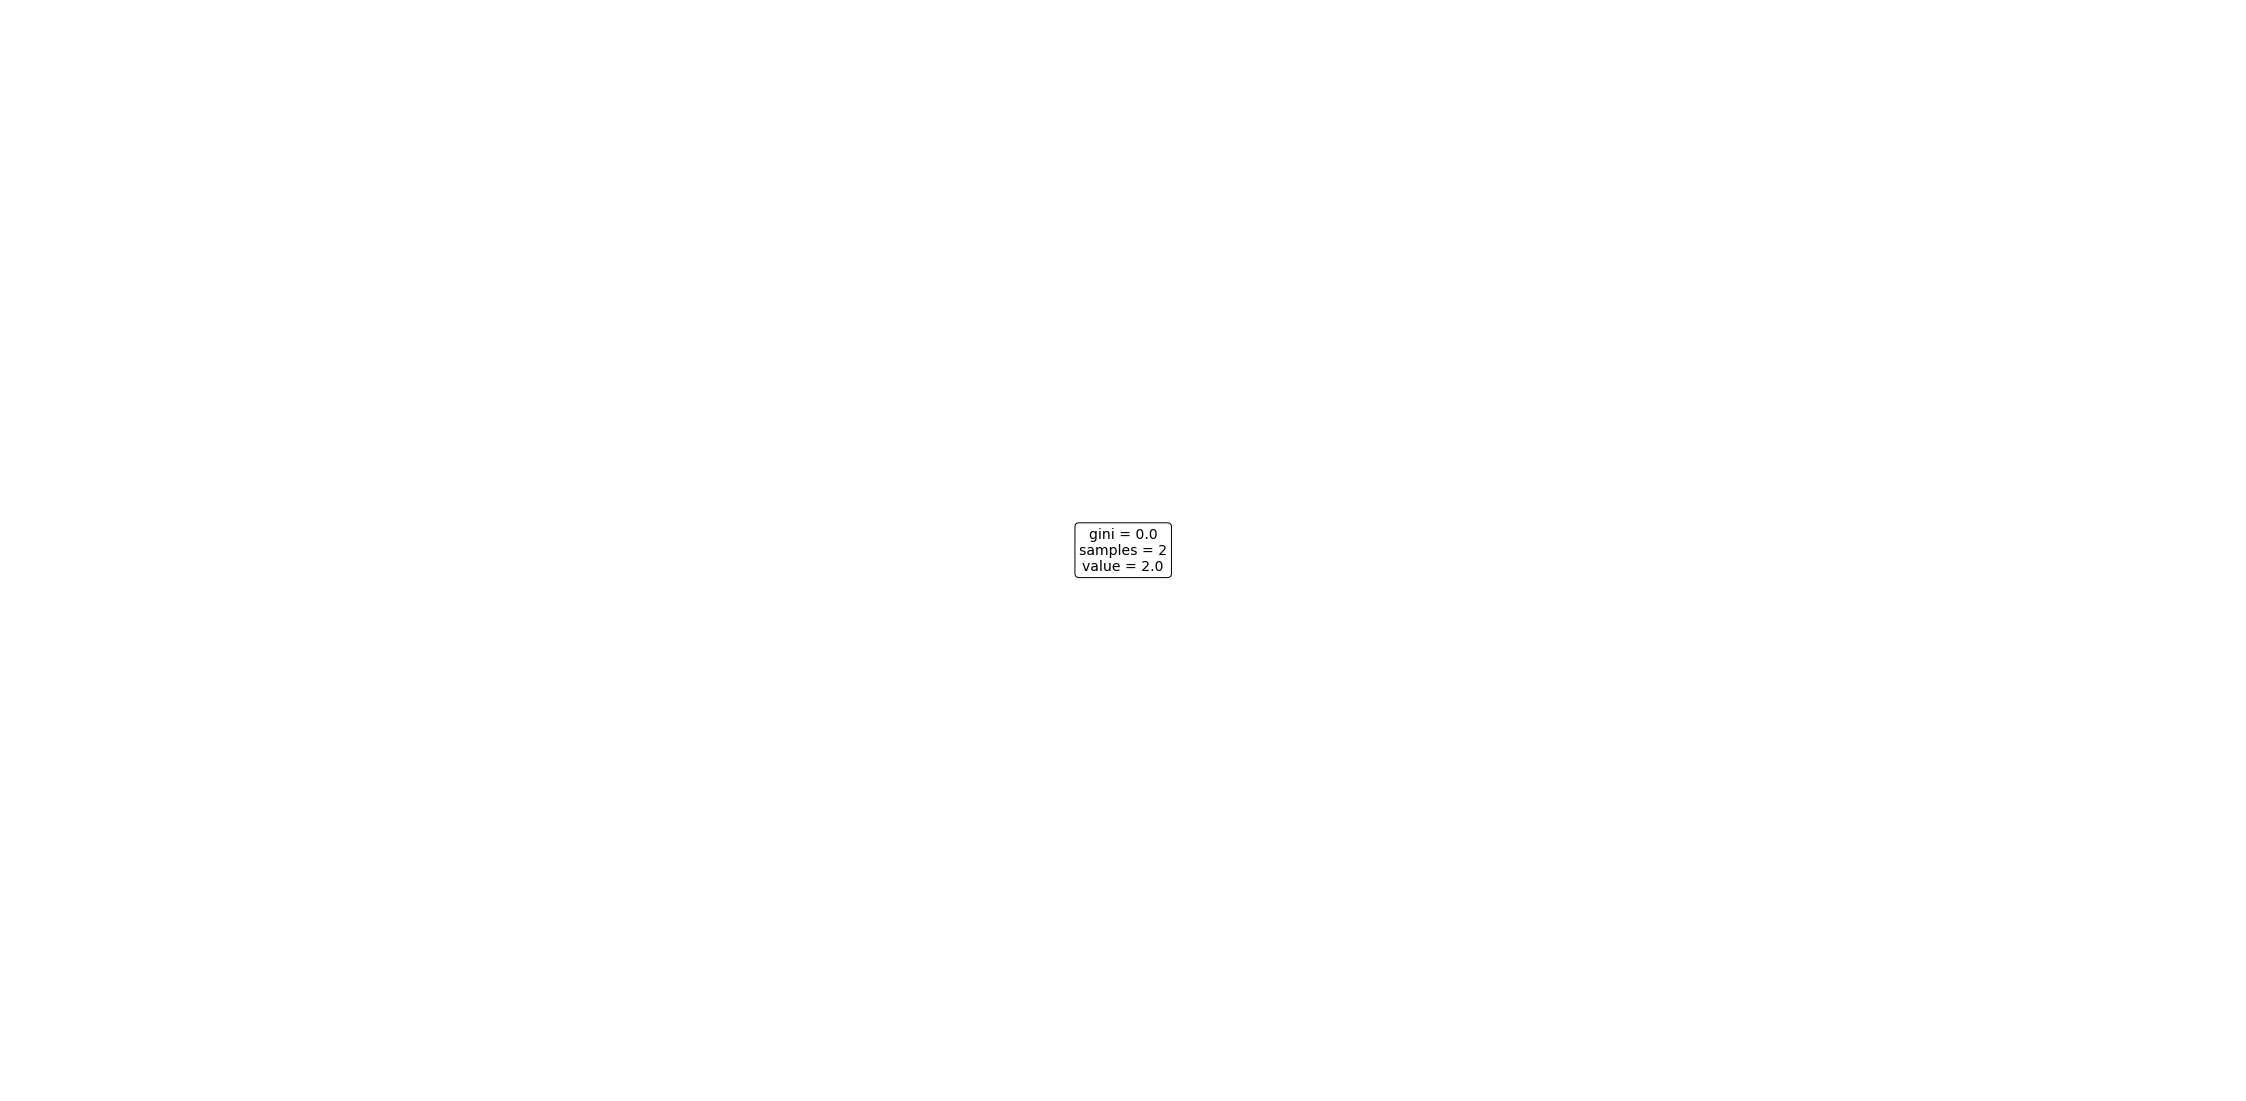

In [21]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier_feature, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [22]:
y_pred_train = classifier_feature.predict(x_train)
y_pred_test = classifier_feature.predict(x_test)

In [23]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 100.0


In [24]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 100.0


### Slice Model

In [25]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(slice_x,slice_y,test_size=0.30,random_state=5)

In [26]:
classifier_slice = DecisionTreeClassifier(max_depth=6)
classifier_slice.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

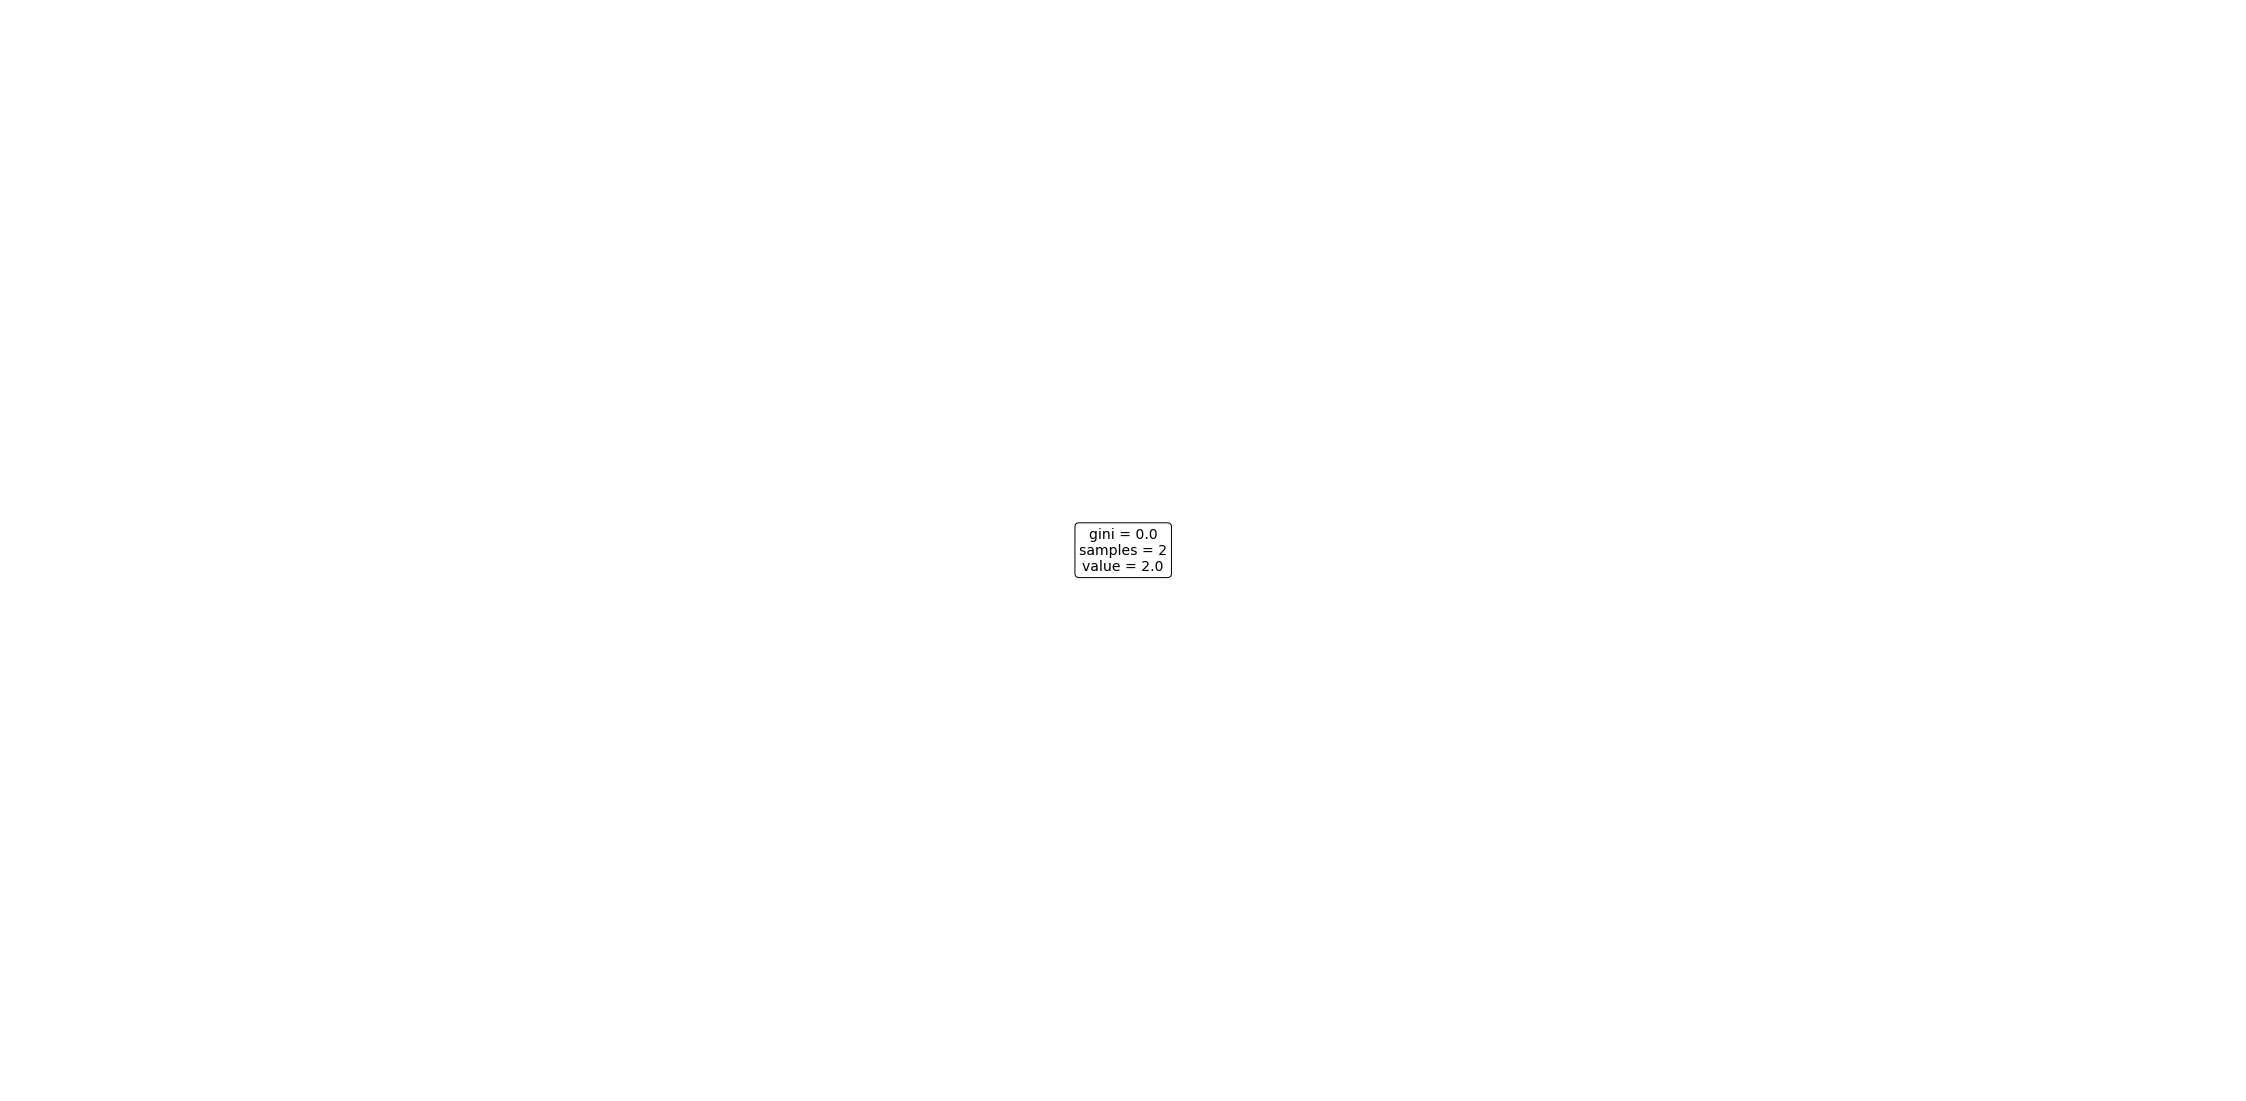

In [27]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier_slice, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [28]:
y_pred_train = classifier_slice.predict(x_train)
y_pred_test = classifier_slice.predict(x_test)

In [29]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 100.0


In [30]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 100.0
